<h1> Import Librabries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('clean_dataset.csv')

## Handling Outliers

<h2> 1. 'birth_incorp_date' column

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='birth_incorp_date', ylabel='Density'>

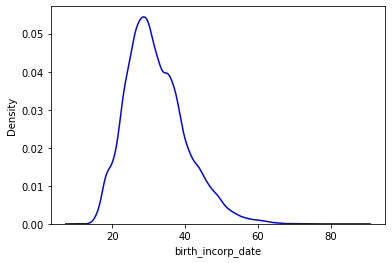

In [3]:
sns.distplot(data['birth_incorp_date'], hist = False, color = 'b')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='birth_incorp_date'>

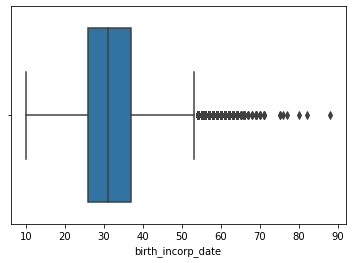

In [4]:
sns.boxplot('birth_incorp_date',data=data)

We will handle Outliers in 'birth_incorp_date' column by Binning.

In [5]:
birth_incorp_date = data['birth_incorp_date'].values.tolist()

def impute_birth_incorp_date(col):
    birth_incorp_date = col[0]
    if birth_incorp_date < 19:
        return '6-18'
    if birth_incorp_date < 31:
        return '19-30'
    if birth_incorp_date < 51:
        return '31-50'
    else:
        return 'Over 50'

In [6]:
data['birth_incorp_date'] = data[['birth_incorp_date']].apply(impute_birth_incorp_date, axis = 1)

In [7]:
data['birth_incorp_date'].value_counts()

31-50      26845
19-30      25191
Over 50     1419
6-18        1335
Name: birth_incorp_date, dtype: int64

<h2> 2. 'max_amount_week' column

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_amount_week'>

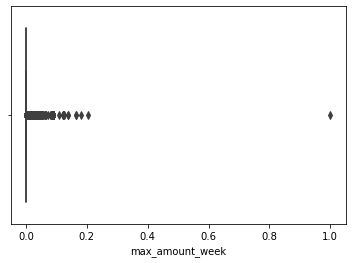

In [8]:
sns.boxplot('max_amount_week',data=data)

We will identify Outlier in 'max_amount_week' column by IQR method.

In [9]:
max_amount_week = data['max_amount_week'].values.tolist()
Q1 = np.percentile(data[['max_amount_week']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['max_amount_week']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['max_amount_week']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

We will handling Outliers in this column by Capping:
- If Outlier < low_lim, replace them by low_lim
- If Outlier > up_lim, replace them by up_lim

In [10]:
data['max_amount_week'] = np.where(data['max_amount_week'] > up_lim, up_lim, 
                               np.where(data['max_amount_week'] < low_lim, low_lim, data['max_amount_week']))

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_amount_week'>

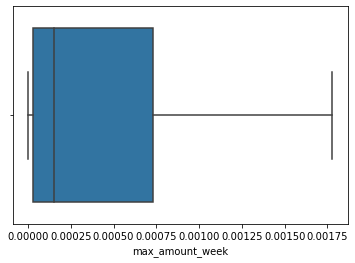

In [11]:
sns.boxplot('max_amount_week',data=data)

<h2> 3. 'min_amount_week' column

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='min_amount_week'>

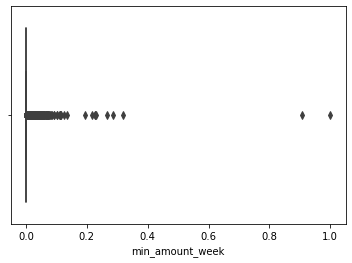

In [12]:
sns.boxplot('min_amount_week',data=data)

Use IQR to identify Outliers.

In [13]:
min_amount_week = data['min_amount_week'].values.tolist()
Q1 = np.percentile(data[['min_amount_week']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['min_amount_week']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['min_amount_week']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

Handling Outliers by Capping.

In [14]:
data['min_amount_week'] = np.where(data['min_amount_week'] > up_lim, up_lim, 
                               np.where(data['min_amount_week'] < low_lim, low_lim, data['min_amount_week']))

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='min_amount_week'>

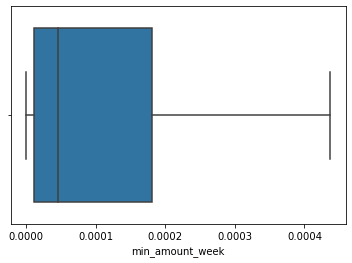

In [15]:
sns.boxplot('min_amount_week',data=data)

<h2> 4. 'diff_amount_week' column

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diff_amount_week'>

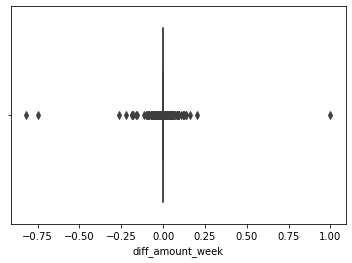

In [16]:
sns.boxplot('diff_amount_week',data=data)

Use IQR method to identify Outliers.

In [17]:
diff_amount_week = data['diff_amount_week'].values.tolist()
Q1 = np.percentile(data[['diff_amount_week']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['diff_amount_week']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['diff_amount_week']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

Handling Outliers by Capping.

In [18]:
data['diff_amount_week'] = np.where(data['diff_amount_week'] > up_lim, up_lim, 
                               np.where(data['diff_amount_week'] < low_lim, low_lim, data['diff_amount_week']))

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diff_amount_week'>

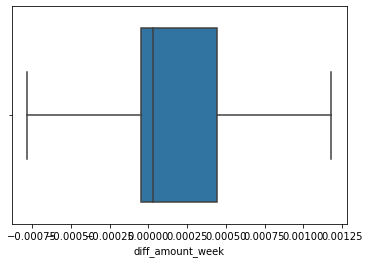

In [19]:
sns.boxplot('diff_amount_week',data=data)

<h2> 5. 'distinct_payment_code_week' column

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distinct_payment_code_week'>

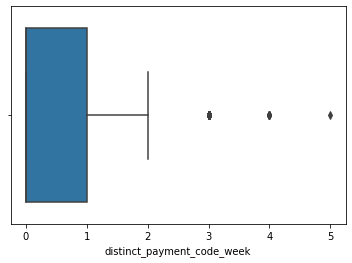

In [20]:
sns.boxplot('distinct_payment_code_week',data=data)

With Outliers in 'distinct_payment_code_week' column, we will handle them by Binning.

In [21]:
distinct_payment_code_week = data['distinct_payment_code_week'].values.tolist()

def impute_distinct_payment_code_week(col):
    distinct_payment_code_week = col[0]
    if distinct_payment_code_week < 2:
        return distinct_payment_code_week
    else:
        return 'Other'

In [22]:
data['distinct_payment_code_week'] = data[['distinct_payment_code_week']].apply(impute_distinct_payment_code_week, axis = 1)

In [23]:
data['distinct_payment_code_week'].value_counts()

0.0      37035
1.0      16482
Other     1273
Name: distinct_payment_code_week, dtype: int64

<h2> 6. 'count_payment_code_week' column

<AxesSubplot:ylabel='count_payment_code_week'>

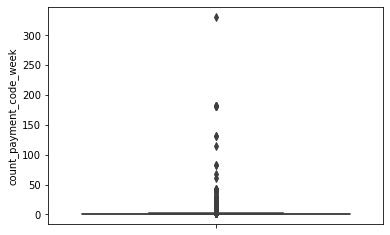

In [24]:
sns.boxplot(y='count_payment_code_week',data=data)

Use IQR method to identify Outliers.

In [25]:
count_payment_code_week = data['count_payment_code_week'].values.tolist()
Q1 = np.percentile(data[['count_payment_code_week']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['count_payment_code_week']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['count_payment_code_week']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

Handling Outliers by Capping.

In [26]:
data['count_payment_code_week'] = np.where(data['count_payment_code_week'] > up_lim, up_lim, 
                               np.where(data['count_payment_code_week'] < low_lim, low_lim, data['count_payment_code_week']))

<AxesSubplot:ylabel='count_payment_code_week'>

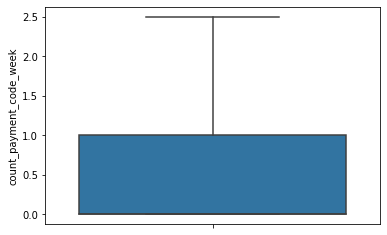

In [27]:
sns.boxplot(y='count_payment_code_week',data=data)

<h2> 7. 'distinct_trans_group_week' column


<AxesSubplot:xlabel='Is_churn', ylabel='distinct_trans_group_week'>

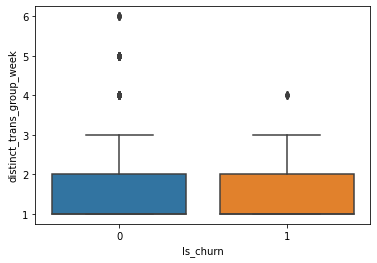

In [28]:
sns.boxplot(x = 'Is_churn', y='distinct_trans_group_week',data=data)

<AxesSubplot:ylabel='distinct_trans_group_week'>

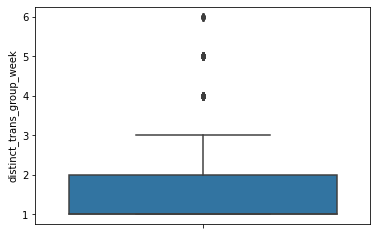

In [29]:
sns.boxplot(y = 'distinct_trans_group_week',data=data)

Handling Outliers by Binning.

In [30]:
distinct_trans_group_week = data['distinct_trans_group_week'].values.tolist()

def impute_distinct_trans_group_week(col):
    distinct_trans_group_week = col[0]
    if distinct_trans_group_week < 3:
        return distinct_trans_group_week
    else:
        return 'Other'

In [31]:
data['distinct_trans_group_week'] = data[['distinct_trans_group_week']].apply(impute_distinct_trans_group_week, axis = 1)

In [32]:
data['distinct_trans_group_week'].value_counts()

1.0      32842
2.0      17100
Other     4848
Name: distinct_trans_group_week, dtype: int64

<h2> 8. 'distinct_ref_no_week' column

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distinct_ref_no_week'>

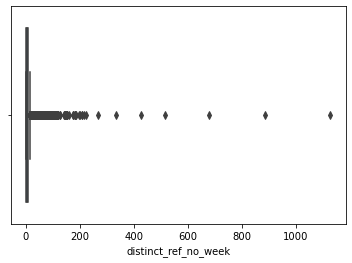

In [33]:
sns.boxplot('distinct_ref_no_week',data=data)

In [34]:
distinct_ref_no_week = data['distinct_ref_no_week'].values.tolist()
Q1 = np.percentile(data[['distinct_ref_no_week']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['distinct_ref_no_week']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['distinct_ref_no_week']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [35]:
data['distinct_ref_no_week'] = np.where(data['distinct_ref_no_week'] > up_lim, up_lim, 
                               np.where(data['distinct_ref_no_week'] < low_lim, low_lim, data['distinct_ref_no_week']))

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distinct_ref_no_week'>

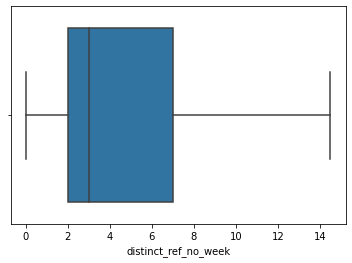

In [36]:
sns.boxplot('distinct_ref_no_week',data=data)

<h2> 9. 'amount_month' column

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount_month', ylabel='Density'>

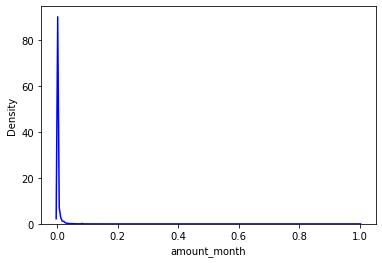

In [37]:
sns.distplot(data['amount_month'], hist = False, color = 'b')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount_month'>

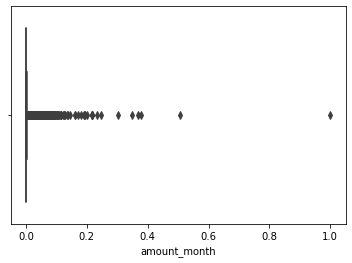

In [38]:
sns.boxplot('amount_month',data=data)

Use IQR to identify Outliers.

In [39]:
amount_month = data['amount_month'].values.tolist()
Q1 = np.percentile(data[['amount_month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['amount_month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['amount_month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

Handling Outliers by Capping.

In [40]:
data['amount_month'] = np.where(data['amount_month'] > up_lim, up_lim, 
                               np.where(data['amount_month'] < low_lim, low_lim, data['amount_month']))

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount_month'>

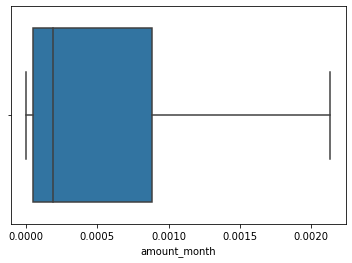

In [41]:
sns.boxplot('amount_month',data=data)

<h2> 10. 'max_amount_month' column

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_amount_month'>

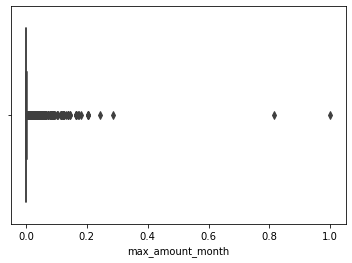

In [42]:
sns.boxplot('max_amount_month',data=data)

Use IQR method to identify Outliers.

In [43]:
max_amount_month = data['max_amount_month'].values.tolist()
Q1 = np.percentile(data[['max_amount_month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['max_amount_month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['max_amount_month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

Handling Outliers by Capping.

In [44]:
data['max_amount_month'] = np.where(data['max_amount_month'] > up_lim, up_lim, 
                               np.where(data['max_amount_month'] < low_lim, low_lim, data['max_amount_month']))

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_amount_month'>

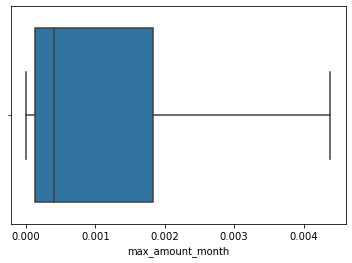

In [45]:
sns.boxplot('max_amount_month',data=data)

<h2> 11. 'min_amount_month' column

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='min_amount_month'>

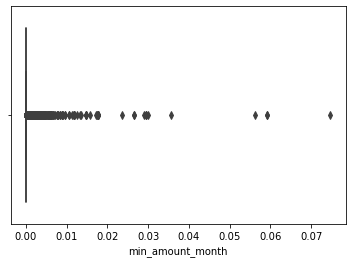

In [46]:
sns.boxplot('min_amount_month',data=data)

Use IQR method to identify Outliers.

In [47]:
min_amount_month = data['min_amount_month'].values.tolist()
Q1 = np.percentile(data[['min_amount_month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['min_amount_month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['min_amount_month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

Handling Outliers by Capping.

In [48]:
data['min_amount_month'] = np.where(data['min_amount_month'] > up_lim, up_lim, 
                               np.where(data['min_amount_month'] < low_lim, low_lim, data['min_amount_month']))

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='min_amount_month'>

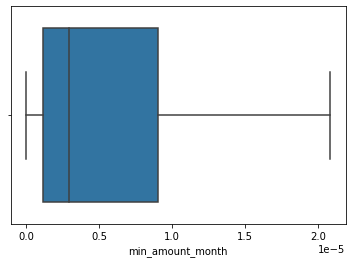

In [49]:
sns.boxplot('min_amount_month',data=data)

<h2> 12. 'diff_amount_month' column

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diff_amount_month'>

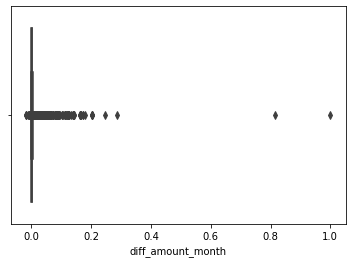

In [50]:
sns.boxplot('diff_amount_month',data=data)

Use IQR method to identify Outliers.

In [51]:
diff_amount_month = data['diff_amount_month'].values.tolist()
Q1 = np.percentile(data[['diff_amount_month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['diff_amount_month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['diff_amount_month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

Handling Outliers by Capping.

In [52]:
data['diff_amount_month'] = np.where(data['diff_amount_month'] > up_lim, up_lim, 
                               np.where(data['diff_amount_month'] < low_lim, low_lim, data['diff_amount_month']))

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diff_amount_month'>

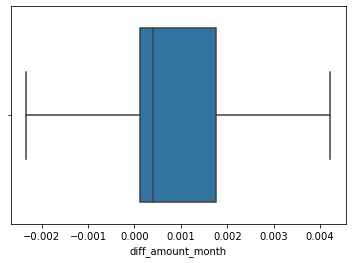

In [53]:
sns.boxplot('diff_amount_month',data=data)

<h2> 13. 'distinct_payment_code_month' column

<AxesSubplot:ylabel='distinct_payment_code_month'>

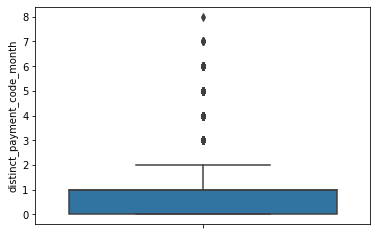

In [54]:
sns.boxplot(y='distinct_payment_code_month',data=data)

Handling Outliers by Binning.

In [55]:
distinct_payment_code_month = data['distinct_payment_code_month'].values.tolist()

def impute_distinct_payment_code_month(col):
    distinct_payment_code_month = col[0]
    if distinct_payment_code_month < 3:
        return distinct_payment_code_month
    else:
        return 'Other'

In [56]:
data['distinct_payment_code_month'] = data[['distinct_payment_code_month']].apply(impute_distinct_payment_code_month, axis = 1)

In [57]:
data['distinct_payment_code_month'].value_counts()

1.0      24868
0.0      19940
2.0       6479
Other     3503
Name: distinct_payment_code_month, dtype: int64

<h2> 14. 'count_payment_code_month' column

<AxesSubplot:ylabel='count_payment_code_month'>

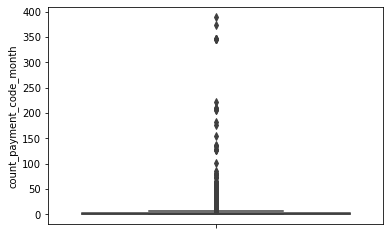

In [58]:
sns.boxplot(y='count_payment_code_month',data=data)

Use IQR method to identify Outliers.

In [59]:
count_payment_code_month = data['count_payment_code_month'].values.tolist()
Q1 = np.percentile(data[['count_payment_code_month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['count_payment_code_month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['count_payment_code_month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

Handling Outliers by Capping.

In [60]:
data['count_payment_code_month'] = np.where(data['count_payment_code_month'] > up_lim, up_lim, 
                               np.where(data['count_payment_code_month'] < low_lim, low_lim, data['count_payment_code_month']))

<AxesSubplot:ylabel='count_payment_code_month'>

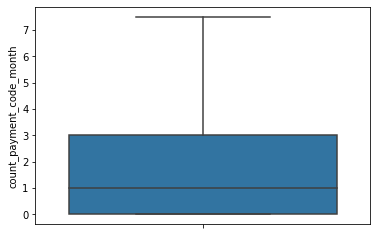

In [61]:
sns.boxplot(y='count_payment_code_month',data=data)

<h2> 15. 'distinct_trans_group_month' column

<AxesSubplot:ylabel='distinct_trans_group_month'>

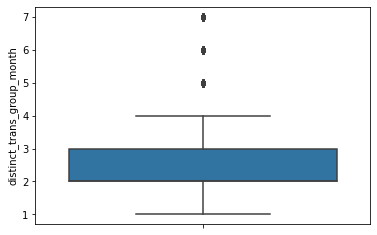

In [62]:
sns.boxplot(y='distinct_trans_group_month',data=data)

Handling Outliers by Binning.

In [63]:
distinct_trans_group_month = data['distinct_trans_group_month'].values.tolist()

def impute_distinct_trans_group_month(col):
    distinct_trans_group_month = col[0]
    if distinct_trans_group_month < 4:
        return distinct_trans_group_month
    else:
        return 'Other'

In [64]:
data['distinct_trans_group_month'] = data[['distinct_trans_group_month']].apply(impute_distinct_trans_group_month, axis = 1)

In [65]:
data['distinct_trans_group_month'].value_counts()

2.0      24747
3.0      12473
1.0      11569
Other     6001
Name: distinct_trans_group_month, dtype: int64

<h2> 16. 'distinct_ref_no_month' column

<AxesSubplot:ylabel='distinct_ref_no_month'>

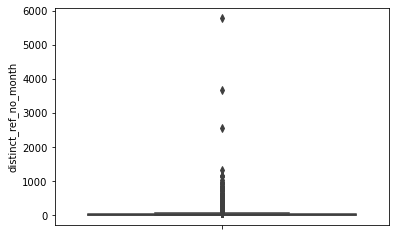

In [67]:
sns.boxplot(y = 'distinct_ref_no_month',data=data)

Use IQR method to identify Outliers.

In [68]:
distinct_ref_no_month = data['distinct_ref_no_month'].values.tolist()
Q1 = np.percentile(data[['distinct_ref_no_month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['distinct_ref_no_month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['distinct_ref_no_month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

Handling Outliers by Capping.

In [69]:
data['distinct_ref_no_month'] = np.where(data['distinct_ref_no_month'] > up_lim, up_lim, 
                               np.where(data['distinct_ref_no_month'] < low_lim, low_lim, data['distinct_ref_no_month']))

<AxesSubplot:ylabel='distinct_ref_no_month'>

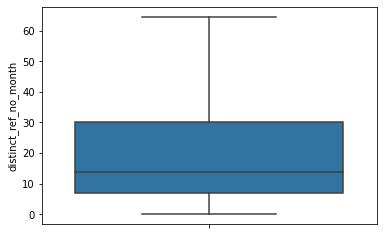

In [71]:
sns.boxplot(y = 'distinct_ref_no_month',data=data)

<h2> 17. 'amount_3month' column

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount_3month', ylabel='Density'>

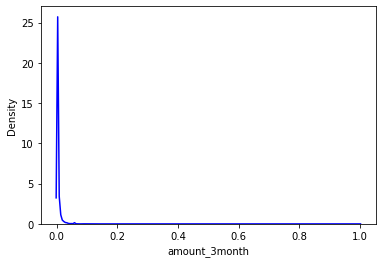

In [72]:
sns.distplot(data['amount_3month'], hist = False, color = 'b')

<AxesSubplot:ylabel='amount_3month'>

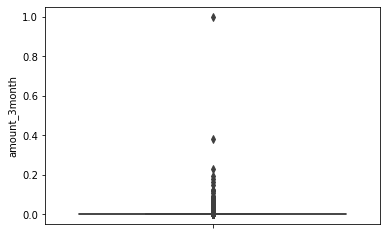

In [73]:
sns.boxplot(y = 'amount_3month',data=data)

Use IQR method to identify Outliers.

In [74]:
amount_3month = data['amount_3month'].values.tolist()
Q1 = np.percentile(data[['amount_3month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['amount_3month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['amount_3month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

Handling Outliers by Capping

In [75]:
data['amount_3month'] = np.where(data['amount_3month'] > up_lim, up_lim, 
                               np.where(data['amount_3month'] < low_lim, low_lim, data['amount_3month']))

<AxesSubplot:ylabel='amount_3month'>

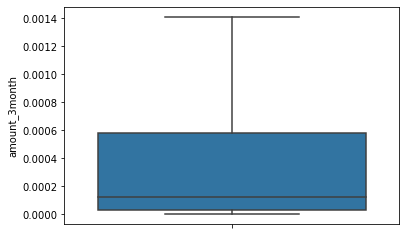

In [76]:
sns.boxplot(y = 'amount_3month',data=data)

<h2> 18. 'max_amount_3month' column

<AxesSubplot:ylabel='max_amount_3month'>

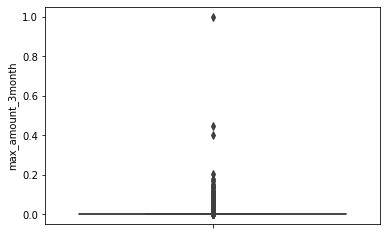

In [77]:
sns.boxplot(y = 'max_amount_3month',data=data)

Use IQR method to identify Outliers.

In [78]:
max_amount_3month = data['max_amount_3month'].values.tolist()
Q1 = np.percentile(data[['max_amount_3month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['max_amount_3month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['max_amount_3month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

Handling Outliers by Capping.

In [79]:
data['max_amount_3month'] = np.where(data['max_amount_3month'] > up_lim, up_lim, 
                               np.where(data['max_amount_3month'] < low_lim, low_lim, data['max_amount_3month']))

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_amount_3month'>

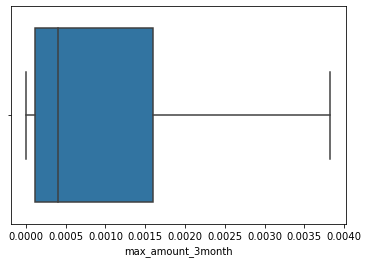

In [80]:
sns.boxplot('max_amount_3month',data=data)

<h2> 19. 'min_amount_3month' column

<AxesSubplot:ylabel='min_amount_3month'>

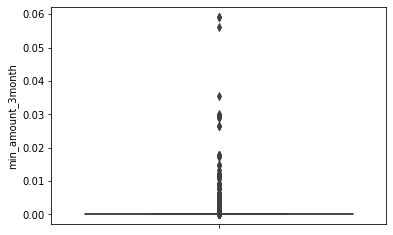

In [82]:
sns.boxplot(y = 'min_amount_3month',data=data)

Use IQR method to identify Outliers.

In [83]:
min_amount_3month = data['min_amount_3month'].values.tolist()
Q1 = np.percentile(data[['min_amount_3month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['min_amount_3month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['min_amount_3month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

Handling Outliers by Capping.

In [84]:
data['min_amount_3month'] = np.where(data['min_amount_3month'] > up_lim, up_lim, 
                               np.where(data['min_amount_3month'] < low_lim, low_lim, data['min_amount_3month']))

<AxesSubplot:ylabel='min_amount_3month'>

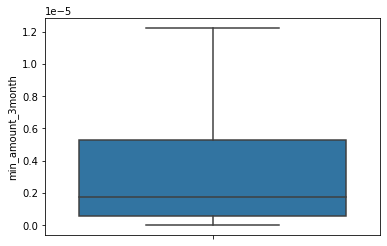

In [85]:
sns.boxplot(y = 'min_amount_3month',data=data)

<h2> 20. 'diff_amount_3month' column

<AxesSubplot:ylabel='diff_amount_3month'>

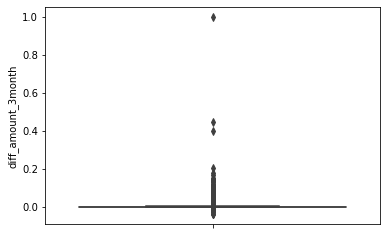

In [86]:
sns.boxplot(y = 'diff_amount_3month',data=data)

Use IQR method to identify Outliers.

In [87]:
diff_amount_3month = data['diff_amount_3month'].values.tolist()
Q1 = np.percentile(data[['diff_amount_3month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['diff_amount_3month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['diff_amount_3month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

Handling Outliers by Capping.

In [88]:
data['diff_amount_3month'] = np.where(data['diff_amount_3month'] > up_lim, up_lim, 
                               np.where(data['diff_amount_3month'] < low_lim, low_lim, data['diff_amount_3month']))

<AxesSubplot:ylabel='diff_amount_3month'>

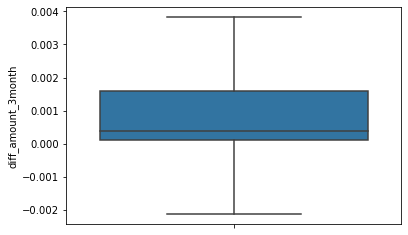

In [90]:
sns.boxplot(y = 'diff_amount_3month',data=data)

<h2> 21. 'distinct_payment_code_3month' column


<AxesSubplot:ylabel='distinct_payment_code_3month'>

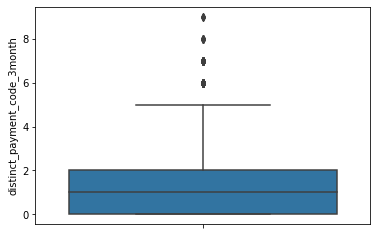

In [92]:
sns.boxplot(y = 'distinct_payment_code_3month',data=data)

Handling Outliers by Binning.

In [93]:
distinct_payment_code_3month = data['distinct_payment_code_3month'].values.tolist()

def impute_distinct_payment_code_3month(col):
    distinct_payment_code_3month = col[0]
    if distinct_payment_code_3month < 4:
        return distinct_payment_code_3month
    else:
        return 'Other'

In [94]:
data['distinct_payment_code_3month'] = data[['distinct_payment_code_3month']].apply(impute_distinct_payment_code_3month, axis = 1)

In [95]:
data['distinct_payment_code_3month'].value_counts()

1        26206
0        13934
2         8290
3         3975
Other     2385
Name: distinct_payment_code_3month, dtype: int64

<h2> 22. 'count_payment_code_3month' column

<AxesSubplot:ylabel='count_payment_code_3month'>

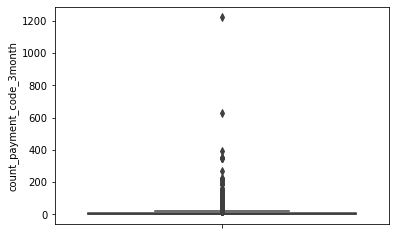

In [96]:
sns.boxplot(y='count_payment_code_3month',data=data)

Use IQR method to identify Outliers.

In [97]:
count_payment_code_3month = data['count_payment_code_3month'].values.tolist()
Q1 = np.percentile(data[['count_payment_code_3month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['count_payment_code_3month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['count_payment_code_3month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

Handling Outliers by Capping.

In [98]:
data['count_payment_code_3month'] = np.where(data['count_payment_code_3month'] > up_lim, up_lim, 
                               np.where(data['count_payment_code_3month'] < low_lim, low_lim, data['count_payment_code_3month']))

<AxesSubplot:ylabel='count_payment_code_3month'>

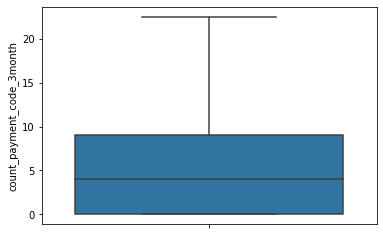

In [99]:
sns.boxplot(y='count_payment_code_3month',data=data)

<h2> 23. 'distinct_trans_group_3month' column

<AxesSubplot:ylabel='distinct_trans_group_3month'>

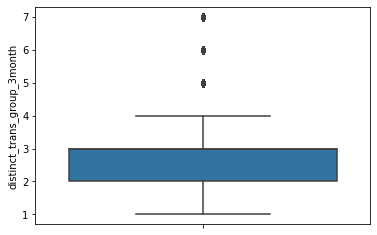

In [101]:
sns.boxplot(y='distinct_trans_group_3month',data=data)

Handling Outliers by Binning.

In [102]:
distinct_trans_group_3month = data['distinct_trans_group_3month'].values.tolist()

def impute_distinct_trans_group_3month(col):
    distinct_trans_group_3month = col[0]
    if distinct_trans_group_3month < 5:
        return distinct_trans_group_3month
    else:
        return 'Other'

In [103]:
data['distinct_trans_group_3month'] = data[['distinct_trans_group_3month']].apply(impute_distinct_trans_group_3month, axis = 1)

In [104]:
data['distinct_trans_group_3month'].value_counts()

3        23593
2        13764
4         9126
Other     4447
1         3860
Name: distinct_trans_group_3month, dtype: int64

<h2> 24. 'distinct_ref_no_3month' column

<AxesSubplot:ylabel='distinct_ref_no_3month'>

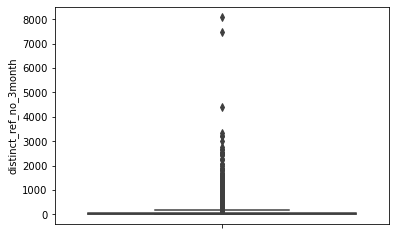

In [105]:
sns.boxplot(y ='distinct_ref_no_3month',data=data)

Use IQR method to identify Outliers.

In [106]:
distinct_ref_no_3month = data['distinct_ref_no_3month'].values.tolist()
Q1 = np.percentile(data[['distinct_ref_no_3month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['distinct_ref_no_3month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['distinct_ref_no_3month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

Handling Outliers by Capping.

In [107]:
data['distinct_ref_no_3month'] = np.where(data['distinct_ref_no_3month'] > up_lim, up_lim, 
                               np.where(data['distinct_ref_no_3month'] < low_lim, low_lim, data['distinct_ref_no_3month']))

<AxesSubplot:ylabel='distinct_ref_no_3month'>

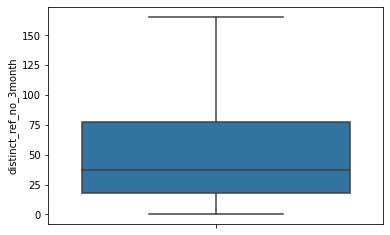

In [108]:
sns.boxplot(y = 'distinct_ref_no_3month',data=data)

In [111]:
data.to_csv('dataset without outlier.csv', index=False)